In [2]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import camb
from camb import model, initialpower
from matplotlib.font_manager import FontProperties
from scipy import integrate
from scipy import special
from scipy import signal, interpolate
from numba import jit
import constnumberfile as cn
import functionfilegraph as ff
import sys; sys.path.append('..')
from scipy.optimize import curve_fit
from MHexample import vari as MHvari
#import CAMBPS.PSfun as PS
import subprocess
import itertools
#subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'UCMH.ipynb'])
from matplotlib.ticker import NullFormatter

(16, 1000)
(41, 1000)
0
10
(20, 16) (21,) (20, 16)


In [14]:
zmin=10
zlist=np.linspace(15,25,30)      
#zlist=np.array([20])
zclist=np.logspace(np.log10(150),np.log10(1e5),50) 
#kmin=ff.kvir(20,1e4)
kmin=100
#kmin=1e2
kmax=3000
dk=30
klist=np.logspace(np.log10(kmin),np.log10(kmax),dk)
dxy=30
J=5
k01=np.logspace(-J,0,dxy)
k02=np.logspace(0,-J,dxy)
k05=np.hstack((-k02,[0],k01))
k06=np.hstack(([0],k01))
def dzclist(zcmin):
    dzclist=np.linspace(zcmin,1050,30)
    return dzclist

In [15]:
@jit ('f8(f8[:],f8[:],f8[:],f8[:],f8[:],f8,f8,f8,f8)')
def Tbavec(klist,zclist,zlist,k05,k06,A0,B0,NM,ex):
    C=np.zeros((len(klist),len(zclist),len(zlist))) ; Rv=np.zeros((len(klist),len(zclist),len(zlist))) ;
    Mv=np.zeros((len(klist),len(zclist),len(zlist))) ; tgasave=np.zeros((len(klist),len(zclist),len(zlist))) ;
    rgasave=np.zeros((len(klist),len(zclist),len(zlist))) ; tbave=np.zeros((len(klist),len(zclist),len(zlist))) ;
    tgas=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ; rgas=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ;
    ts=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ; taucum=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ;
    tsave=np.zeros((len(klist),len(zclist),len(zlist))) ; Frac=np.zeros((len(klist),len(zclist),len(zlist))) ;
    tbr=np.zeros((len(klist),len(zclist),len(zlist),len(k05)))
    for i,kk in enumerate(klist):
        for k,z in enumerate(zlist):
            for j,zc in enumerate(zclist):
                if (zc>4000):
                    zc=4000
                c,rv,mv,frac,Tgas,Rgas,Ts,Tsave,Tgasave,Rgasave,Tbave,Taucum,Tbr=ff.singleUCMH(k05,k05,z,zc,kk,A0,B0,k06,0,NM,ex)
                C[i,j,k],Rv[i,j,k],Mv[i,j,k],Frac[i,j,k],tsave[i,j,k],tgasave[i,j,k],rgasave[i,j,k],tbave[i,j,k],taucum[i,j,k],tbr[i,j,k]=c,rv,mv,frac,Tsave,Tgasave,Rgasave,Tbave,Taucum,Tbr
                tgas[i,j,k],rgas[i,j,k],ts[i,j,k]=Tgas,Rgas,Ts
        if(i%50==0):
            print(i)
    return  C,Rv,Mv,Frac,tgas,rgas,ts,tsave,tgasave,rgasave,tbave,taucum,tbr

In [16]:
for i,NM in enumerate(['N','M']):
    if(i==0):
        rd=200
    else:
        rd=200
    exec("c%s,rv%s,mv%s,frac%s,tgas%s,rgas%s,ts%s,tsave%s,tgasave%s,rgasave%s,tbave%s,taucum%s,tbr%s \
    =Tbavec(klist,dzclist(50),zlist,k05,k06,30,rd,i,0)" \
    %(NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM))

0
0


In [81]:
Param_zcz=np.zeros((len(dzclist(50)),len(zlist)))
Param_zc=np.zeros(len(dzclist(50)))
def linear_fit(x, a,b):
    return a*x+b
for i,zc in enumerate(dzclist(50)):
    for j,z in enumerate(zlist):
        param, cov = curve_fit(linear_fit, np.log(klist), np.log(mvM[:,i,j]))
        Param_zcz[i,j]=np.e**param[1]
print(Param_zcz.shape)
def linear_fitzc(x, a,b):
    return a*x+b
for i,z in enumerate(zlist):
    param, cov = curve_fit(linear_fitzc,np.log(dzclist(50)),np.log(Param_zcz[:,i]))
    Param_zc[i]=np.e**param[1]
    print(param[0])
#print(Param_zc)
param, cov = curve_fit(linear_fitzc,np.log(dzclist(50)),np.log(Param_zc))
print(param)

(30, 30)
0.4805346830286437
0.4868718341905963
0.4905599341114364
0.49515425564276266
0.4995943950131781
0.5046033920516189
0.5085208213285399
0.5131516364269902
0.5179247877865534
0.5225826092693084
0.5266613295636876
0.5305278335343793
0.5363889927160309
0.5399328241645414
0.545039926239925
0.5494228313733417
0.5511214746273075
0.5557703042000871
0.5607050932245259
0.5655311502397493
0.5681063227099586
0.5730323243464674
0.5751871635024532
0.5814056425632288
0.5841189342315429
0.5895899211330242
0.5945409717548724
0.597980961595964
0.6028810086865634
0.6068761327440685
[-0.35628755 28.96699302]


-2.9999999999999996 28.897769003678125


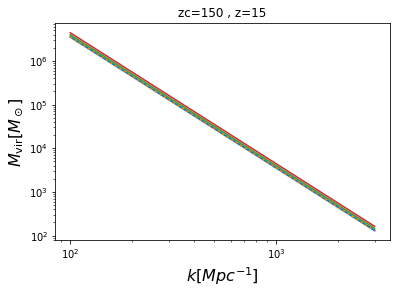

In [117]:
plt.loglog(klist,mvM[:,0,0],linewidth=2)
plt.xlabel(r'$k[Mpc^{-1}]$',size=16)
plt.ylabel(r'$M_{\rm vir}[M_{\rm \odot}]$',size=16)
plt.title('zc=%d , z=%d'%(zclist[0],zlist[0]))
def linear_fit(x, a,b):
    return a*x+b
param, cov = curve_fit(linear_fit, np.log(klist), np.log(mvM[:,0,0]))
plt.loglog(klist,np.e**linear_fit(np.log(klist),param[0],param[1]),linewidth=2,ls=':')
plt.loglog(klist,np.e**(28.0)*zlist[0]**(-0.35)*dzclist(50)[0]**(0.5)*klist**(-3))
plt.loglog(klist,3.8*1e12*klist**(-3)*np.log((1+dzclist(50)[0])/(1+zlist[0])))
print(param[0],param[1])

0.48053468516195025 13.493972732825739


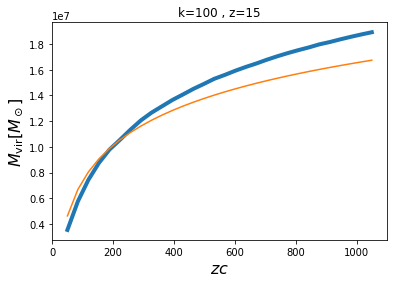

In [127]:
plt.plot(dzclist(50),mvM[0,:,0],linewidth=4)
plt.xlabel(r'$zc$',size=16)
plt.ylabel(r'$M_{\rm vir}[M_{\rm \odot}]$',size=16)
plt.title('k=%d , z=%d'%(klist[0],zlist[0]))
def linear_fitzc(x, a,b):
    return a*x+b
param, cov = curve_fit(linear_fitzc, np.log(dzclist(50)), np.log(mvM[0,:,0]))
#plt.plot(dzclist(50),np.e**linear_fitzc(np.log(dzclist(50)),param[0],param[1]),linewidth=2,ls=':')
#plt.loglog(dzclist(50),np.e**(28.0)*zlist[0]**(-0.35)*dzclist(50)**(0.5)*klist[0]**(-3))
plt.plot(dzclist(50),4*1e12*klist[0]**(-3)*np.log((1+dzclist(50))/(1+zlist[0])))
print(param[0],param[1])

-0.3877848994613916 1.0839691138796055 14.990044344692967


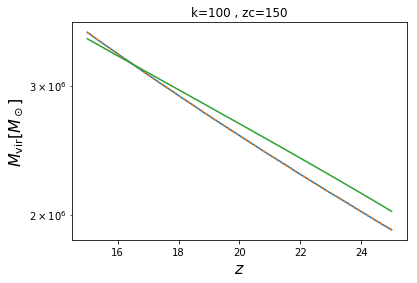

In [130]:
plt.semilogy(zlist,mvM[0,0,:])
plt.xlabel(r'$z$',size=16)
plt.ylabel(r'$M_{\rm vir}[M_{\rm \odot}]$',size=16)
plt.title('k=%d , zc=%d'%(klist[0],zclist[0]))
def linear_fitz(x, a,b,c):
    return a*x**2+b*x+c
param, cov = curve_fit(linear_fitz, np.log(zlist), np.log(mvM[0,0,:]))
plt.plot(zlist,np.e**linear_fitz(np.log(zlist),param[0],param[1],param[2]),linewidth=2,ls=':')
#plt.semilogy(zlist,np.e**(29)*zlist**(-0.8)*dzclist(50)[0]**(0.5)*klist[0]**(-3))
plt.plot(zlist,3.0*1e12*klist[0]**(-3)*np.log((1+dzclist(50)[0])/(1+zlist)))
print(param[0],param[1],param[2])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


100.0
0.3979458644595327


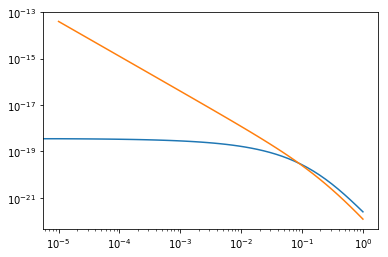

In [6]:
plt.loglog(k05,rgasM[5,0,0,50,:])
plt.loglog(k05,30*(1+50)**3*0.25*cn.rc0/((k05*cM[5,0,0])**(1.5)*(1+k05*cM[5,0,0])**(1.5)))
#plt.loglog(k05*rvM[0,13,0],tgasM[0,13,0,50,:],color=cycle[i],ls=l)
#plt.loglog(k05*rvM[4,13,0],tsM[4,13,0,50,:],color=cycle[i],ls=':')
print(klist[0])
#plt.axhline(y=1e5)
#plt.axhline(y=1e7)
print(rvM[0,13,0]*1e3)
#plt.axhline(y=cn.tcmb0*(1+zlist[0]))

136.2334485943098 5988.0239520958075


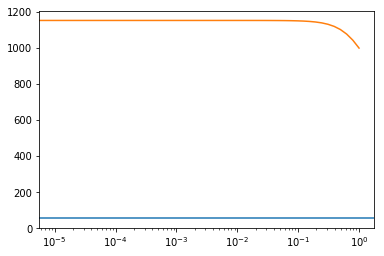

In [7]:
#plt.loglog(k05,abs(tbrM[12,0,0,:]-cn.tcmb0*(1+zlist[0])),color=cycle[0],ls=l)
#plt.semilogx(k05,tbrM[12,10,0,:],color=cycle[1],ls='--')
#plt.semilogx(k05,tbrM[12,0,0,:],color=cycle[1],ls='--')
plt.semilogx(k05,tgasM[9,0,0,0,:],color=cycle[i],ls=l)
plt.axhline(y=cn.tcmb0*(1+zlist[0]))
print(klist[9],1e-23/cn.mp)

In [8]:
#plt.loglog(klist,tgasM[:,0,0,50,50],color=cycle[i],ls=l)
#plt.loglog(klist,tgasM[:,13,0,50,50],color=cycle[i],ls=':')
#plt.semilogx(k05,taucumM[0,0,0,50,:],color=cycle[1],ls='--')
#plt.semilogx(k05,taucumM[3,0,0,50,:],color=cycle[1],ls='--')
print(klist[0])
#plt.axhline(y=1e5)

100.0


In [9]:
print(rgasaveM[10,8,0],tgasaveM[10,8,0]/1e6,rvM[10,8,0]*1e3,klist[10])

9.130300824988329e-22 0.002445460982954717 0.2699873958207822 140.99514780634456


Text(0.5, 0, '$k_{\\rm{spike}}[\\rm{Mpc}^{-1}]$')

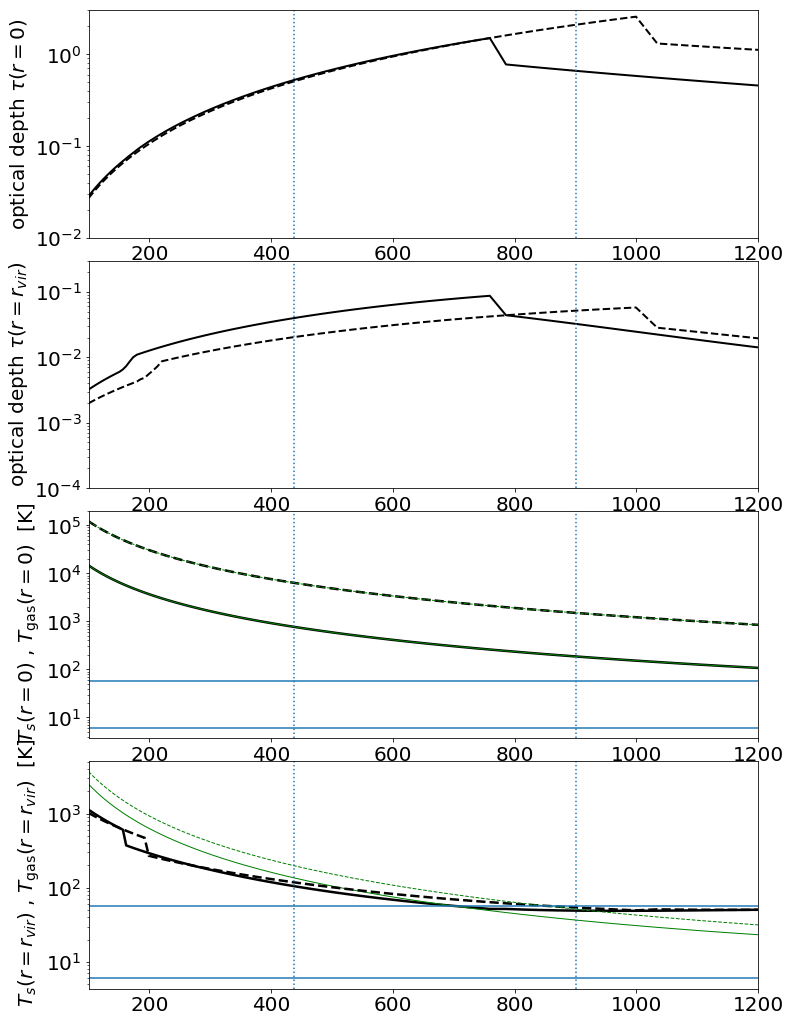

In [10]:
fig, ax = plt.subplots(4, 1,figsize=(12, 18))
plt.subplots_adjust(hspace=0.1)
linestyles = ['-', '--', '-.', ':']
for k,i in enumerate([1,13]):
    ax[0].semilogy(klist,taucumM[:,i,0,50,50],label=r'$\tau(r=0)$zc=%s'%zclist[i],ls=linestyles[k],color='black',linewidth=2)
    #ax[1,0].loglog(klist,taucumnb[:,i,1,101,101],label='zc=%s (nb)'%zclist[i],linestyle=linestyles[k],color=cycle[i])
#ax[1].set_title(label='zobs=25 central optical depth',size=18)
ax[0].set_ylabel(r'optical depth $\tau(r=0)$',size=20)
ax[0].set_ylim(1e-2,3)
for k,i in enumerate([1,13]):
    ax[1].semilogy(klist,taucumM[:,i,0,99,99],label=r'$\tau(r=r_{vir})$zc=%s'%zclist[i],ls=linestyles[k],color='black',linewidth=2)
    #ax[1,0].loglog(klist,taucumnb[:,i,1,101,101],label='zc=%s (nb)'%zclist[i],linestyle=linestyles[k],color=cycle[i])
#ax[1].set_title(label='zobs=25 central optical depth',size=18)
ax[1].set_ylabel(r'optical depth $\tau(r=r_{vir})$',size=20)
ax[1].set_ylim(1e-4,3*1e-1)
for k,i in enumerate([1,13]):
    #ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    ax[2].semilogy(klist,tsM[:,i,0,50,50],label=r'$\overline{T}_s$ zc=%s'%zclist[i],ls=linestyles[k],color='black',linewidth=2.5)
    ax[2].semilogy(klist,tgasM[:,i,0,50,50],label=r'$\overline{T}_{\rm{gas}}$ zc=%s'%zclist[i],ls=linestyles[k],color='green',linewidth=1)
ax[2].axhline(y=cn.tcmb0*(1+zlist[0]))
ax[2].axhline(y=ff.TRgasigm(zlist[0])[0])
ax[2].set_ylabel(r' $  {T}_{s}(r=0)$ , ${T}_{\rm{gas}}(r=0)$  [K]',size=20)
for k,i in enumerate([1,13]):
    #ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    ax[3].semilogy(klist,tsM[:,i,0,99,99],label=r'$\overline{T}_s$ zc=%s'%zclist[i],ls=linestyles[k],color='black',linewidth=2.5)
    ax[3].semilogy(klist,tgasM[:,i,0,99,99],label=r'$\overline{T}_{\rm{gas}}$ zc=%s'%zclist[i],ls=linestyles[k],color='green',linewidth=1)
ax[3].axhline(y=cn.tcmb0*(1+zlist[0]))
ax[3].axhline(y=ff.TRgasigm(zlist[0])[0])
ax[3].set_ylabel(r' $  {T}_{s}(r=r_{vir})$ , ${T}_{\rm{gas}}(r=r_{vir})$  [K]',size=20)
for i in range(4):
    #ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
    #ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
    ax[i].set_xlim(100,1200)
    ax[i].axvline(x=437,ls=':')
    ax[i].tick_params(labelsize=20)
    #ax[i].axvline(x=577,ls=':')
    #ax[i].axvline(x=682)
    ax[i].axvline(x=900,ls=':')
    #ax[i].legend(fontsize=20)
ax[2].set_xlabel(r'$k_{\rm{spike}}[\rm{Mpc}^{-1}]$',size=25)
#plt.savefig('/Users/kokoorikunihiko/Desktop/figure.pdf')

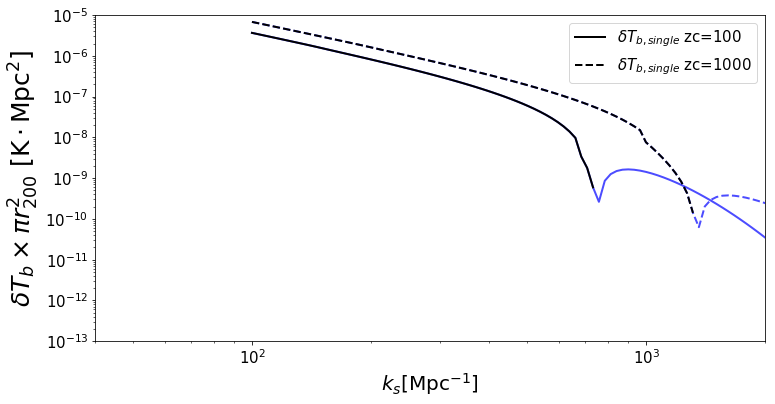

In [11]:
plt.subplots(figsize=(12, 6))
for k,i in enumerate([0,9]):
    plt.plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*rvM[:,i,0]**2,color='blue',ls=linestyles[k],linewidth=2,alpha=0.7)
    plt.plot(klist,(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*rvM[:,i,0]**2,label=r'$\delta T_{b,single}$ zc=%d'%dzclist(100)[i],color='black',ls=linestyles[k],linewidth=2)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
plt.yscale('logit')
plt.xscale('log')
plt.ylabel(r'$\delta T_{b} \times \pi r_{200}^2$ $[\rm{K \cdot Mpc^2}]$',size=25)
plt.xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=20)
plt.legend(fontsize=15)
plt.ylim(1e-13,1e-5)
plt.xlim(40,2000)
plt.tick_params(labelsize=15)
plt.gca().yaxis.set_minor_formatter(NullFormatter())

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


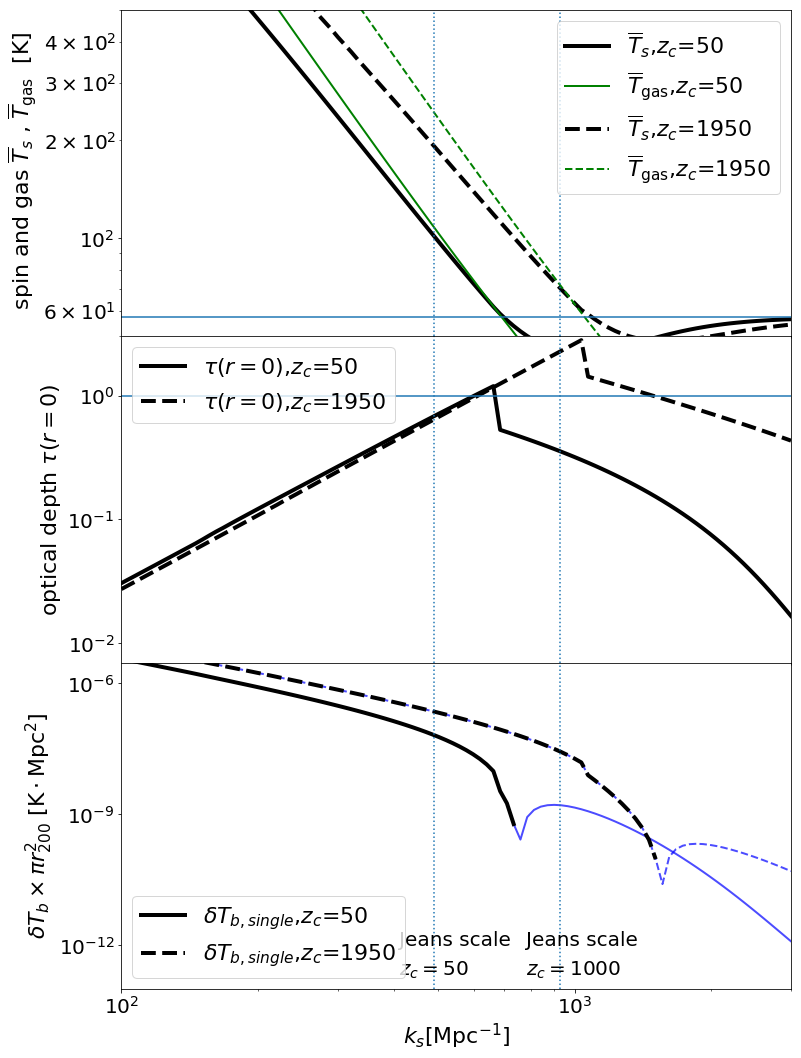

In [12]:
fig, ax = plt.subplots(3, 1,figsize=(12, 18))
plt.subplots_adjust(hspace=0)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
for k,i in enumerate([0,19]):
    #ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    ax[0].loglog(klist,tsaveM[:,i,0],label=r'$\overline{T}_s$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='black',linewidth=4)
    ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
ax[0].axhline(y=cn.tcmb0*(1+zlist[0]))
ax[0].axhline(y=ff.TRgasigm(zlist[0])[0])
ax[0].set_ylabel(r' spin and gas $  \overline{T}_{s}$ , $\overline{T}_{\rm{gas}}$  [K]',size=22)
ax[0].set_ylim(50,500)
#ax[0].set_yticks([300],[300])
for k,i in enumerate([0,19]):
    ax[1].semilogy(klist,taucumM[:,i,0,50,50],label=r'$\tau(r=0)$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='black',linewidth=4)
    #ax[1,0].loglog(klist,taucumnb[:,i,1,101,101],label='zc=%s (nb)'%zclist[i],linestyle=linestyles[k],color=cycle[i])
#ax[1].set_title(label='zobs=25 central optical depth',size=18)
ax[1].set_ylabel(r'optical depth $\tau(r=0)$',size=22)
ax[1].set_ylim(7*1e-3,3)
ax[1].axhline(y=1)
for k,i in enumerate([0,19]):
    ax[2].plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*rvM[:,i,0]**2,color='blue',ls=linestyles[k],linewidth=2,alpha=0.7)
    ax[2].plot(klist,(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*rvM[:,i,0]**2,label=r'$\delta T_{b,single}$,$z_c$=%d'%dzclist(50)[i],color='black',ls=linestyles[k],linewidth=4)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
ax[2].set_yscale('logit')
ax[2].set_ylabel(r'$\delta T_{b} \times \pi r_{200}^2$ $[\rm{K \cdot Mpc^2}]$',size=22)
ax[2].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
ax[2].legend(fontsize=15)
ax[2].set_ylim(1e-13,3*1e-6)
ax[2].set_xlim(100,2000)
ax[2].set_yticks([1e-6,1e-9,1e-12])
plt.gca().yaxis.set_minor_formatter(NullFormatter())
ax[0].tick_params(labelbottom=False)
ax[1].tick_params(labelbottom=False)
ax[1].minorticks_off()
ax[2].minorticks_off()
ax[2].text(780,1e-12,r"Jeans scale",size=20 )
ax[2].text(780,2*1e-13,r"$z_c=1000$",size=20)
ax[2].text(410,1e-12,r"Jeans scale",size=20 )
ax[2].text(410,2*1e-13,r"$z_c=50$",size=20)
for i in range(3):
    #ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
    #ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
    ax[i].set_xlim(100,3000)
    ax[i].axvline(x=490,ls=':')
    ax[i].set_xscale('log')
    ax[i].tick_params(labelsize=20)
    ax[i].tick_params(axis='y', which='minor', labelsize=20)
    #ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
    #ax[i].axvline(x=577,ls=':')
    #ax[i].axvline(x=682)
    ax[i].axvline(x=930,ls=':')
    ax[i].legend(fontsize=22)
plt.savefig('/Users/kokoorikunihiko/Desktop/figure1.pdf',bbox_inches='tight')

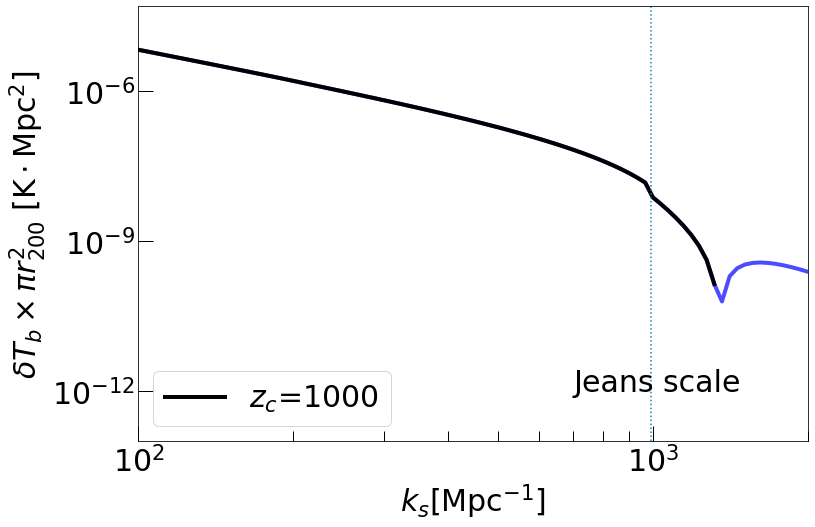

In [13]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))
linestyles = ['-', '--', '-.', ':']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.subplots_adjust(hspace=0)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
#for k,i in enumerate([19]):
    #ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    #ax[0].loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='black',linewidth=4)
    #ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
#ax[0].set_ylabel(r' $M_{b}/M_{dm}$',size=30)
#ax[0].set_ylim(50,500)
#ax[0].set_yticks([300],[300])
for k,i in enumerate([9]):
    ax.plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*rvM[:,i,0]**2,color='blue',ls=linestyles[k],linewidth=4,alpha=0.7)
    ax.plot(klist,(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*rvM[:,i,0]**2,label=r'$z_c$=%d'%dzclist(100)[i],color='black',ls=linestyles[k],linewidth=4)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
ax.set_yscale('logit')
ax.set_ylabel(r'$\delta T_{b} \times \pi r_{200}^2$ $[\rm{K \cdot Mpc^2}]$',size=30)
ax.set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
ax.legend(fontsize=15)
ax.set_ylim(1e-13,5*1e-5)
ax.set_xlim(100,2000)
ax.set_yticks([1e-6,1e-9,1e-12])
plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax.tick_params(labelbottom=False)
ax.minorticks_off()
ax.text(700,1e-12,r"Jeans scale",size=30 )
#ax[1].text(540,2*1e-13,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
#for i in range(2):
    #ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
    #ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
ax.set_xlim(100,2000)
    #ax[i].axvline(x=758,ls=':')
ax.set_xscale('log')
ax.tick_params(labelsize=30)
ax.tick_params(axis='y', which='minor', labelsize=20)
    #ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
    #ax[i].axvline(x=577,ls=':')
    #ax[i].axvline(x=682)
ax.axvline(x=990,ls=':')
ax.legend(fontsize=30)
#plt.savefig('/Users/kokoorikunihiko/Desktop/figure1.pdf',bbox_inches='tight')

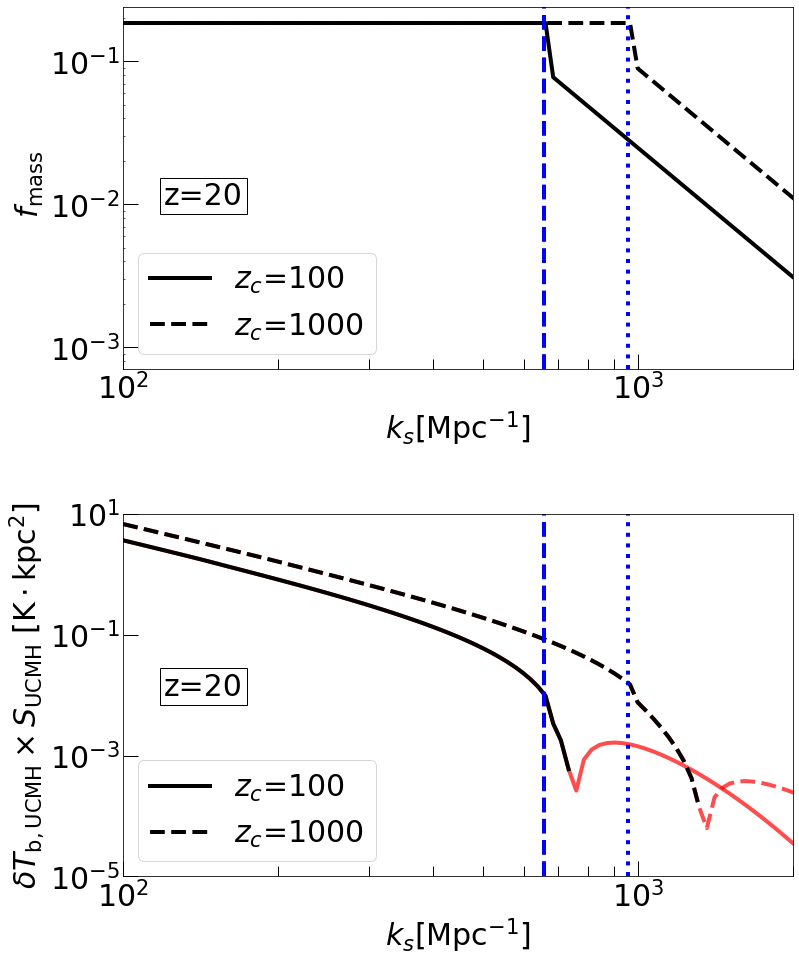

In [67]:
fig, ax = plt.subplots(2, 1,figsize=(12, 16))
linestyles = ['-', '--', '-.', ':']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.subplots_adjust(hspace=0.4)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
for k,i in enumerate([0,9]):
    #ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    ax[0].loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(100)[i],ls=linestyles[k],color='black',linewidth=4)
    #ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
ax[0].set_ylabel(r' $f_{\rm{mass}}$',size=30)
#ax[0].set_ylim(50,500)
#ax[0].set_yticks([300],[300])
plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')
for k,i in enumerate([0,9]):
    ax[1].plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,color='red',ls=linestyles[k],linewidth=4,alpha=0.7)
    ax[1].plot(klist,(Fi[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,label=r'$z_c$=%d'%dzclist(100)[i],color='black',ls=linestyles[k],linewidth=4)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
ax[1].legend(fontsize=15)
ax[1].set_ylim(1e-5,1e1)
ax[1].set_xlim(100,2000)
#ax[1].set_yticks([1e-6,1e-9,1e-12])
plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax[0].tick_params(labelbottom=False)
ax[1].minorticks_off()
#ax[1].text(670,1e-4,r"Jeans scale",size=20 )
#ax[1].text(570,2.1*1e-5,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
for i in range(2):
    #ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
    #ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
    ax[i].set_xlim(100,2000)
    ax[i].axvline(x=658,ls='dashed',linewidth='4',color='blue')
    ax[i].set_xscale('log')
    ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
    ax[i].tick_params(labelsize=30)
    ax[i].tick_params(axis='y', which='minor', labelsize=20)
    #ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
    #ax[i].axvline(x=577,ls=':')
    #ax[i].axvline(x=682)
    ax[i].axvline(x=955,ls='dotted',linewidth='4',color='blue')
    ax[i].legend(fontsize=30)
    ax[i].text(120,1e-2,'z=20',size=30 ,bbox=dict(facecolor='white', alpha=1.0))
plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-b.eps',bbox_inches='tight')

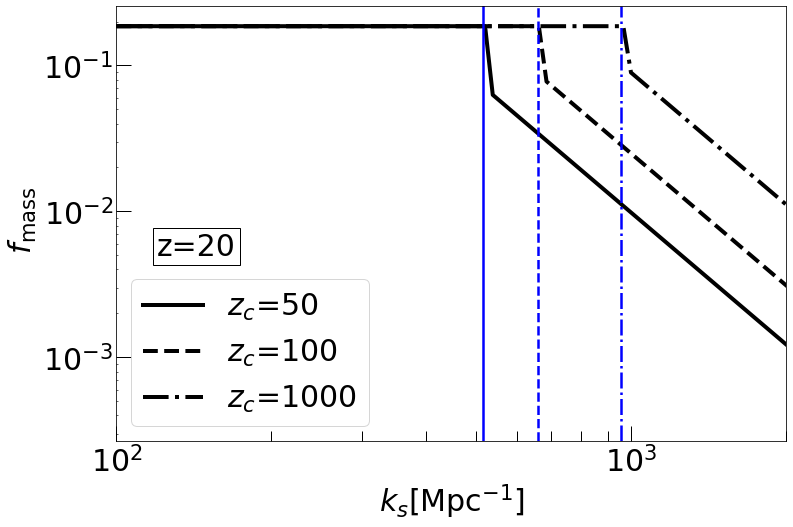

In [105]:
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
linestyles = ['-', '--', '-.', ':']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
for k,i in enumerate([0,1,19]):
#ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    plt.loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='black',linewidth=4)
#ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
plt.ylabel(r' $f_{\rm{mass}}$',size=30)
#ax[0].set_ylim(50,500)
#ax[0].set_yticks([300],[300])
#plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')
#for k,i in enumerate([0,9]):
#ax[1].plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,color='red',ls=linestyles[k],linewidth=4,alpha=0.7)
#ax[1].plot(klist,(Fi[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,label=r'$z_c$=%d'%dzclist(100)[i],color='black',ls=linestyles[k],linewidth=4)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
#ax[1].set_yscale('log')
#ax[1].set_ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[1].legend(fontsize=15)
#ax[1].set_ylim(1e-5,1e1)
#ax[1].set_xlim(100,2000)
#ax[1].set_yticks([1e-6,1e-9,1e-12])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax[0].tick_params(labelbottom=False)
#ax[1].minorticks_off()
#ax[1].text(670,1e-4,r"Jeans scale",size=20 )
#ax[1].text(570,2.1*1e-5,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
#for i in range(2):
#ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
#ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
plt.xlim(100,2000)
plt.axvline(x=658,ls='dashed',linewidth='2.5',color='blue')
plt.xscale('log')
plt.xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
plt.tick_params(labelsize=30)
plt.tick_params(axis='y', which='minor', labelsize=20)
#ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
#ax[i].axvline(x=577,ls=':')
#ax[i].axvline(x=682)
plt.axvline(x=955,ls='-.',linewidth='2.5',color='blue')
plt.axvline(x=515,ls='-',linewidth='2.5',color='blue')
plt.legend(fontsize=30)
plt.text(120,5*1e-3,'z=20',size=30 ,bbox=dict(facecolor='white', alpha=1.0))
plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')

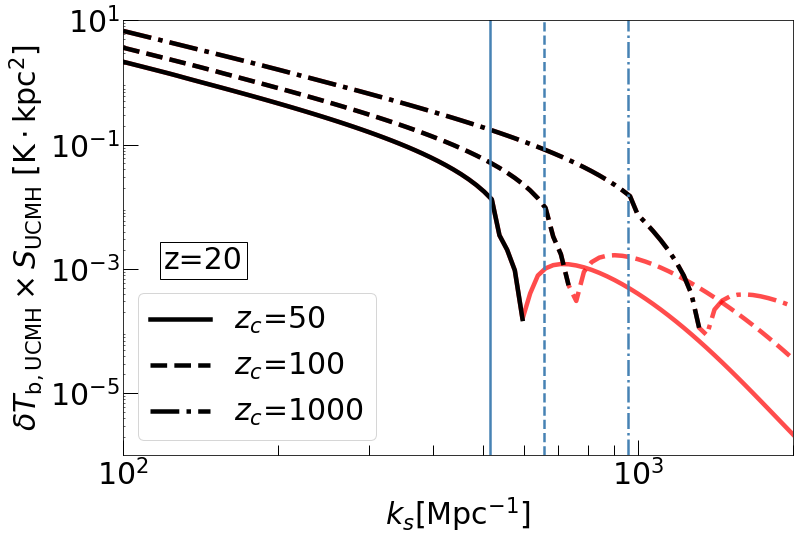

In [9]:
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
linestyles = ['-', '--', '-.', ':']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
#for k,i in enumerate([0,9]):
#ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    #plt.loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(100)[i],ls=linestyles[k],color='black',linewidth=4)
#ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
#plt.ylabel(r' $f_{\rm{mass}}$',size=30)
plt.ylim(1e-6,10)
#ax[0].set_yticks([300],[300])
#plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')
for k,i in enumerate([0,1,19]):
    plt.plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,color='red',ls=linestyles[k],linewidth=4.5,alpha=0.7)
    plt.plot(klist,(Fi[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,label=r'$z_c$=%d'%dzclist(50)[i],color='black',ls=linestyles[k],linewidth=4.5)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
plt.yscale('log')
#ax[1].set_ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[1].legend(fontsize=15)
#ax[1].set_ylim(1e-5,1e1)
#ax[1].set_xlim(100,2000)
plt.yticks([1e-5,1e-3,1e-1,1e1])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax[0].tick_params(labelbottom=False)
#ax[1].minorticks_off()
#ax[1].text(670,1e-4,r"Jeans scale",size=20 )
#ax[1].text(570,2.1*1e-5,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
#for i in range(2):
#ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
#ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
plt.xlim(100,2000)
plt.axvline(x=658,ls='dashed',linewidth='2.5',color='#4682b4')
plt.xscale('log')
plt.xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
plt.tick_params(labelsize=30)
plt.tick_params(axis='y', which='minor', labelsize=20)
plt.ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
#ax[i].axvline(x=577,ls=':')
#ax[i].axvline(x=682)
plt.axvline(x=515,ls='-',linewidth='2.5',color='#4682b4')
plt.axvline(x=955,ls='-.',linewidth='2.5',color='#4682b4')
plt.legend(fontsize=30)
plt.text(120,1e-3,'z=20',size=30 ,bbox=dict(facecolor='white', alpha=1.0))
plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-b.eps',bbox_inches='tight')